# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q=" 
    
     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date = (city_weather['dt'])

    # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#print("Latitude:", city_lat)
#print("Longitude:", city_lon)
#print("Max Temperature:", city_max_temp)
#print("Humidity:", city_humidity)
#print("Cloudiness:", city_clouds)
#print("Wind Speed:", city_wind)
#print("Country:", city_country)
#print("Date:", city_date)

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | giovinazzo
Processing Record 3 of Set 1 | tofol
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | karratha
Processing Record 6 of Set 1 | vanimo
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | port mathurin
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | georgetown
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | coachella
Processing Record 16 of Set 1 | okahandja
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | garhi khairo
Processing Record 20 of Set 1 | west island
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | ribeira grande
Proce

Processing Record 40 of Set 4 | vanino
Processing Record 41 of Set 4 | necochea
Processing Record 42 of Set 4 | nagqu
Processing Record 43 of Set 4 | utrik
Processing Record 44 of Set 4 | ghat
Processing Record 45 of Set 4 | laguna
Processing Record 46 of Set 4 | alvaraes
Processing Record 47 of Set 4 | ridgecrest
Processing Record 48 of Set 4 | khorugh
Processing Record 49 of Set 4 | fortuna
Processing Record 0 of Set 5 | zarghun shahr
Processing Record 1 of Set 5 | presidente venceslau
Processing Record 2 of Set 5 | cargados carajos
City not found. Skipping...
Processing Record 3 of Set 5 | acarau
Processing Record 4 of Set 5 | papao
Processing Record 5 of Set 5 | maridi
Processing Record 6 of Set 5 | tadine
Processing Record 7 of Set 5 | saipan
Processing Record 8 of Set 5 | prata
Processing Record 9 of Set 5 | rundu
Processing Record 10 of Set 5 | ampanihy
Processing Record 11 of Set 5 | linares
Processing Record 12 of Set 5 | lakheri
Processing Record 13 of Set 5 | tangalle
Proces

Processing Record 29 of Set 8 | eger
Processing Record 30 of Set 8 | chippewa falls
Processing Record 31 of Set 8 | tasbuget
City not found. Skipping...
Processing Record 32 of Set 8 | milan
Processing Record 33 of Set 8 | northam
Processing Record 34 of Set 8 | chonchi
Processing Record 35 of Set 8 | ban karon
Processing Record 36 of Set 8 | gizo
Processing Record 37 of Set 8 | kataragama
City not found. Skipping...
Processing Record 38 of Set 8 | st anne
Processing Record 39 of Set 8 | ailuk
Processing Record 40 of Set 8 | waddan
Processing Record 41 of Set 8 | temirlanovka
Processing Record 42 of Set 8 | ta`u
Processing Record 43 of Set 8 | brigantine
Processing Record 44 of Set 8 | praia da vitoria
Processing Record 45 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 46 of Set 8 | st. john's
Processing Record 47 of Set 8 | tanabe
Processing Record 48 of Set 8 | ringkobing
Processing Record 49 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 0 o

Processing Record 20 of Set 12 | polyarnyy
Processing Record 21 of Set 12 | usogorsk
Processing Record 22 of Set 12 | bechar
Processing Record 23 of Set 12 | morant bay
Processing Record 24 of Set 12 | collingwood
Processing Record 25 of Set 12 | halifax
Processing Record 26 of Set 12 | palembang
Processing Record 27 of Set 12 | carinhanha
Processing Record 28 of Set 12 | mabaruma
Processing Record 29 of Set 12 | fulton
Processing Record 30 of Set 12 | bikenibeu village
Processing Record 31 of Set 12 | xilin hot
Processing Record 32 of Set 12 | san carlos de bariloche
Processing Record 33 of Set 12 | middelburg
Processing Record 34 of Set 12 | leava
Processing Record 35 of Set 12 | oroshaza
Processing Record 36 of Set 12 | mabini
Processing Record 37 of Set 12 | mamadysh
Processing Record 38 of Set 12 | richards bay
Processing Record 39 of Set 12 | pitkyaranta
Processing Record 40 of Set 12 | sfax
Processing Record 41 of Set 12 | saint-francois
Processing Record 42 of Set 12 | nuevitas

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data,columns=["City",
                                             "Lat",
                                             "Lng",
                                             "Max Temp",
                                             "Humidity",
                                             "Cloudiness",
                                             "Wind Speed",
                                             "Country",
                                             "Date"])

# Show Record Count
city_data_df.count()

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.55,67,23,10.87,TF,1682664050
1,giovinazzo,41.1864,16.6674,17.95,56,0,1.54,IT,1682664051
2,tofol,5.3248,163.0078,25.88,89,100,1.54,FM,1682664051
3,puerto natales,-51.7236,-72.4875,4.12,96,100,0.53,CL,1682664051
4,karratha,-20.7377,116.8463,32.24,31,100,4.54,AU,1682664053


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.55,67,23,10.87,TF,1682664050
1,giovinazzo,41.1864,16.6674,17.95,56,0,1.54,IT,1682664051
2,tofol,5.3248,163.0078,25.88,89,100,1.54,FM,1682664051
3,puerto natales,-51.7236,-72.4875,4.12,96,100,0.53,CL,1682664051
4,karratha,-20.7377,116.8463,32.24,31,100,4.54,AU,1682664053


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

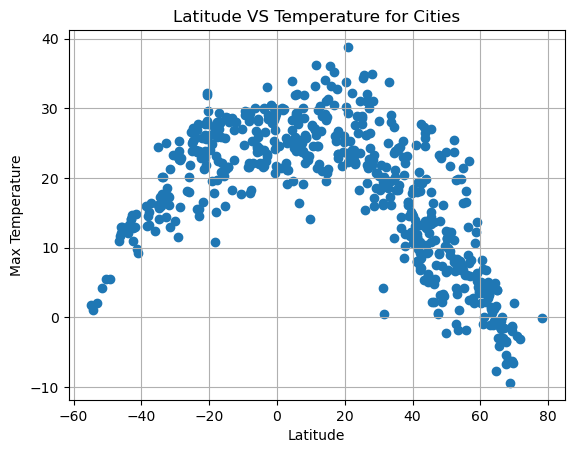

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude VS Temperature for Cities")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat.vs.Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

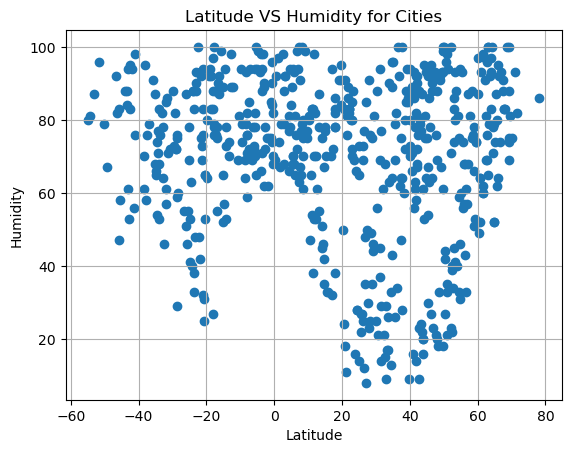

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude VS Humidity for Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat.vs.Humidity.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

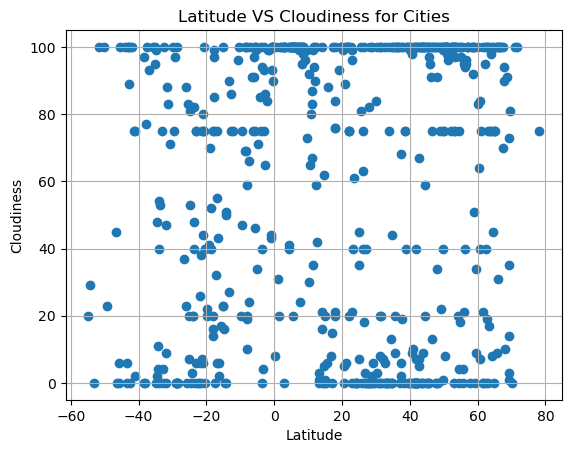

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude VS Cloudiness for Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat.vs.Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

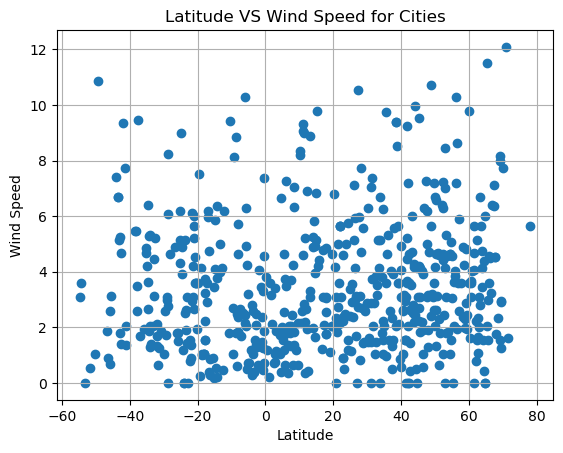

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude VS Wind Speed for Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Lat.vs.WindSpeed.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(X, Y)
regress_values = X * slope + intercept

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,giovinazzo,41.1864,16.6674,17.95,56,0,1.54,IT,1682664051
2,tofol,5.3248,163.0078,25.88,89,100,1.54,FM,1682664051
6,albany,42.6001,-73.9662,7.07,88,67,0.43,US,1682664053
9,hawaiian paradise park,19.5933,-154.9731,23.73,91,100,2.06,US,1682664054
12,georgetown,5.4112,100.3354,31.97,70,20,4.63,MY,1682664055


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.55,67,23,10.87,TF,1682664050
3,puerto natales,-51.7236,-72.4875,4.12,96,100,0.53,CL,1682664051
4,karratha,-20.7377,116.8463,32.24,31,100,4.54,AU,1682664053
5,vanimo,-2.6741,141.3028,28.52,78,86,2.08,PG,1682664053
7,port mathurin,-19.6833,63.4167,26.17,80,22,7.52,MU,1682664053


###  Temperature vs. Latitude Linear Regression Plot

y = -0.46x +32.92
The r-value is: 0.6870291841881216


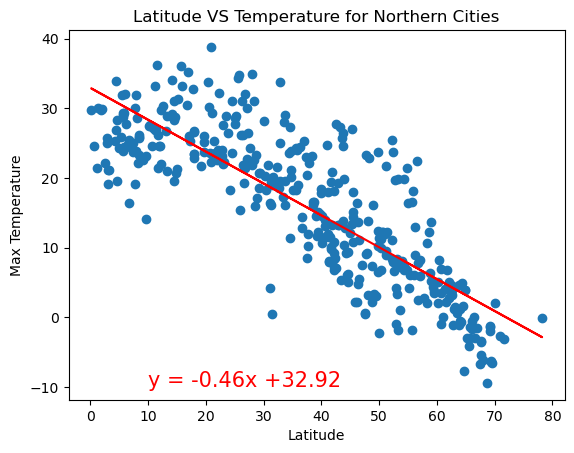

In [17]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")
plt.plot((northern_hemi_df["Lat"]),regress_values,"r-")

plt.title("Latitude VS Temperature for Northern Cities")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.annotate(line_eq,(10,-10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

y = 0.36x +29.15
The r-value is: 0.5807355020463528


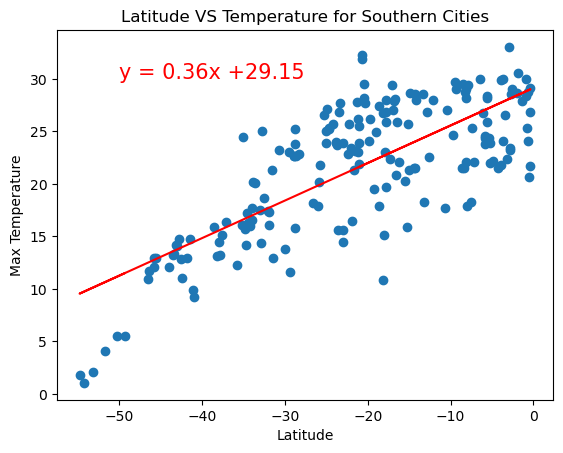

In [18]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")
plt.plot((southern_hemi_df["Lat"]),regress_values,"r-")

plt.title("Latitude VS Temperature for Southern Cities")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 
Northern Cities: The Northern Cities Plot has a Strong, Negative Correlation. As the Latitude increases the Maximum Temperature decreases. 

Southern Cities: The Northern Cities Plot has a Moderate, Positive Correlation. As the Latitude increases the Maximum Temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

y = 0.05x +65.35
The r-value is: 0.001753579527797325


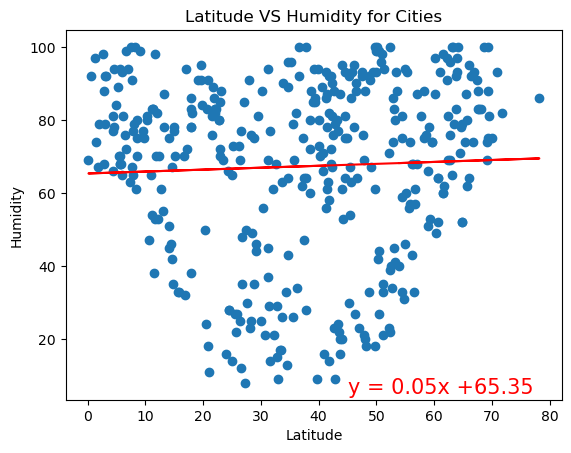

In [19]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")
plt.plot((northern_hemi_df["Lat"]),regress_values,"r-")

plt.title("Latitude VS Humidity for Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq,(45,5),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

y = 0.14x +77.74
The r-value is: 0.01307508896420993


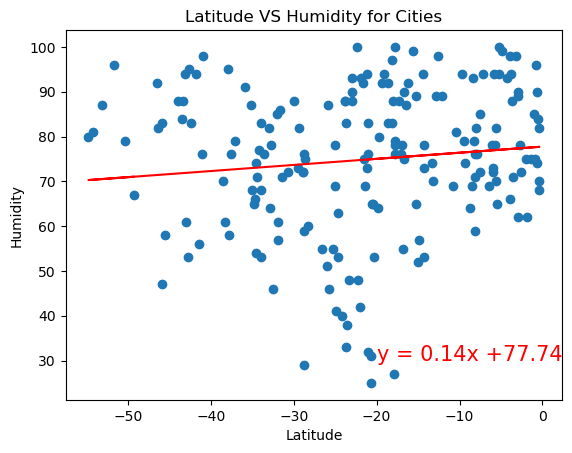

In [20]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
plt.plot((southern_hemi_df["Lat"]),regress_values,"r-")

plt.title("Latitude VS Humidity for Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-20,30),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 
Northern Cities: From the plot, it seems as though there is either no correlation, or at least a very weak correlation. It is also very difficult to verify if there is a positive or negative correlation on first glance, but when looking at specifically the line and the equation, it seems there is a very weak positive correlation. 

Southern Cities: From the plot, it seems as though there is either no correlation, or at least a very weak correlation. It is  very difficult to verify if there is a positive or negative correlation on first glance, but when looking at specifically the line and the equation, it seems there is a very weak positive correlation.  

### Cloudiness vs. Latitude Linear Regression Plot

y = -0.03x +60.61
The r-value is: 0.00019451174194245425


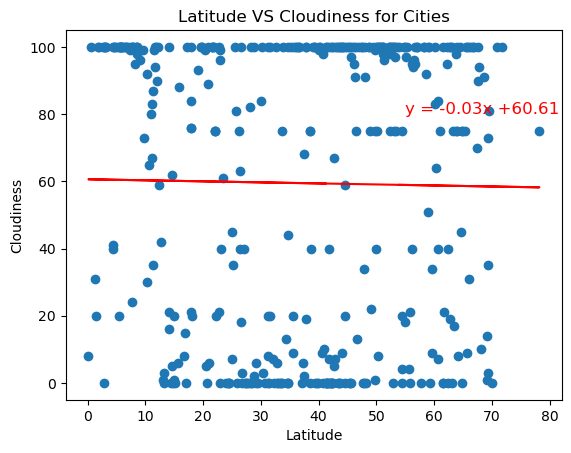

In [21]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")
plt.plot((northern_hemi_df["Lat"]),regress_values,"r-")

plt.title("Latitude VS Cloudiness for Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(55,80),fontsize=12,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

y = 0.64x +66.25
The r-value is: 0.05344654103594599


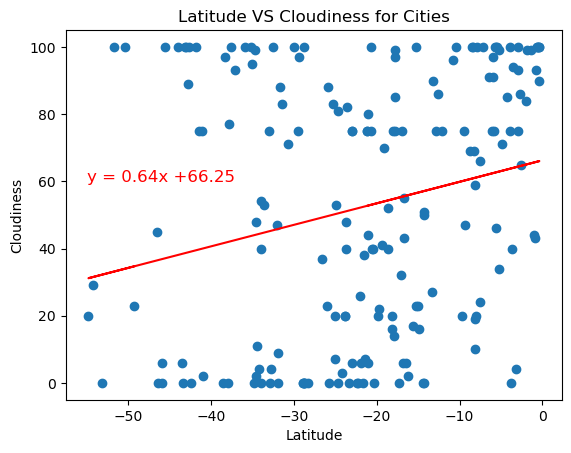

In [22]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")
plt.plot((southern_hemi_df["Lat"]),regress_values,"r-")

plt.title("Latitude VS Cloudiness for Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,60),fontsize=12,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 
Northern Cities:  From the plot, it seems as though there is either no correlation, or at least a very weak correlation. It is  very difficult to verify if there is a positive or negative correlation on first glance, but when looking at specifically the line and the equation, it seems there is a very weak, slightly positive correlation.

Southern Cities:  From the plot, it seems as though there is either no correlation, or at least a very weak correlation. It is  very difficult to verify if there is a positive or negative correlation on first glance, but when looking at specifically the line and the equation, it seems there is a very weak, positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x +2.97
The r-value is: 0.01598077195239958


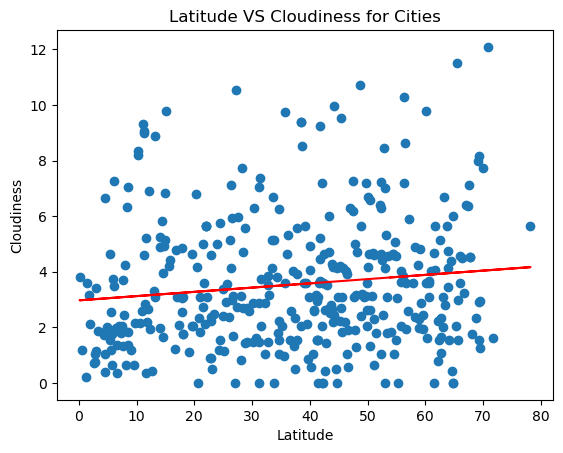

In [23]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regress_values = northern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
plt.plot((northern_hemi_df["Lat"]),regress_values,"r-")

plt.title("Latitude VS Cloudiness for Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,60),fontsize=12,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

y = -0.02x +2.62
The r-value is: 0.0206799342734357


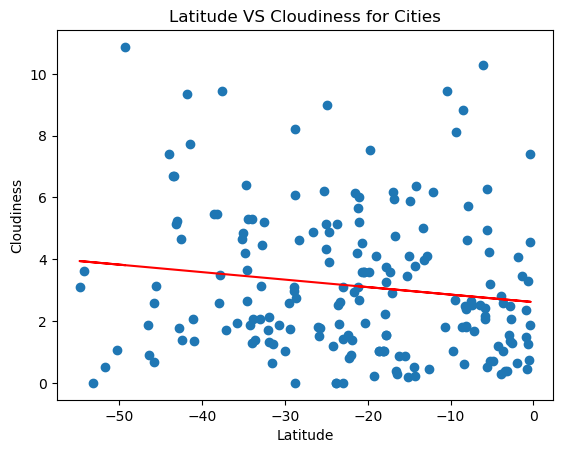

In [24]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regress_values = southern_hemi_df["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")
plt.plot((southern_hemi_df["Lat"]),regress_values,"r-")

plt.title("Latitude VS Cloudiness for Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.annotate(line_eq,(-55,60),fontsize=12,color="red")

print(f"The r-value is: {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** 
Northern Cities:  From the plot, it seems as though there is either no correlation, or at least a very weak correlation. It is  very difficult to verify if there is a positive or negative correlation on first glance, but when looking at specifically the line and the equation, it seems there is a very weak, slightly positive correlation.

Southern Cities:  From the plot, it seems as though there is either no correlation, or at least a very weak correlation. It is  very difficult to verify if there is a positive or negative correlation on first glance, but when looking at specifically the line and the equation, it seems there is a very weak, slightly negative correlation.